####**5) 럭셔리지수**

In [ ]:
#럭셔리지수

In [ ]:
lxr=data[['백화점이용금액','총자산평가금액','자가거주여부', '라이프스테이지', "카드소비금액","하이엔드명품_정보","하이엔드백화점_정보"]]
lxr=pd.DataFrame(lxr)

In [ ]:
lxr

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보
0,449000,9607630,9,2,194000,2,19
1,1433000,7744560,8,5,49300,0,3
2,330000,10609180,11,4,196200,0,4
3,1610000,11066770,2,1,154400,1,94
4,1010000,27984730,21,3,551000,0,31
...,...,...,...,...,...,...,...
434699,1074000,11207130,5,5,53400,0,0
434700,215000,16956640,9,4,166300,0,32
434701,3570000,17045770,6,3,231300,2,87
434702,5798000,5612160,3,2,89700,0,94


In [ ]:
condition_0=lxr[lxr.카드소비금액==0].index
lxr.drop(condition_0, inplace=True)

In [ ]:
lxr.reset_index(drop=True, inplace=True)
lxr

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보
0,449000,9607630,9,2,194000,2,19
1,1433000,7744560,8,5,49300,0,3
2,330000,10609180,11,4,196200,0,4
3,1610000,11066770,2,1,154400,1,94
4,1010000,27984730,21,3,551000,0,31
...,...,...,...,...,...,...,...
434205,1074000,11207130,5,5,53400,0,0
434206,215000,16956640,9,4,166300,0,32
434207,3570000,17045770,6,3,231300,2,87
434208,5798000,5612160,3,2,89700,0,94


In [ ]:
 len(lxr[lxr.하이엔드명품_정보==0]  )   ## 앱이용

226937

In [ ]:
 len(lxr[lxr.하이엔드백화점_정보==0]  )   ## 앱이용

99283

In [ ]:
len(lxr[(lxr.하이엔드명품_정보==0) &(lxr.하이엔드백화점_정보==0) ])

93664

In [ ]:
lxr_00=lxr[(lxr.하이엔드명품_정보==0) &(lxr.하이엔드백화점_정보==0) ]
print(len(lxr_00),    lxr_00.백화점이용금액.sum()/len(lxr_00))

a=lxr_00.백화점이용금액.sum()/94083

93664 141623.9269409805


In [ ]:
lxr_01=lxr[((lxr.하이엔드명품_정보!=0) &(lxr.하이엔드백화점_정보==0)) ]
lxr_10=lxr[((lxr.하이엔드명품_정보==0) & (lxr.하이엔드백화점_정보!=0))]
lxr1=pd.concat([lxr_01,lxr_10])
print(len(lxr1),lxr1.백화점이용금액.sum()/len(lxr1))

b=lxr1.백화점이용금액.sum()/len(lxr1)

138892 793886.2402586183


In [ ]:
lxr_11=lxr[(lxr.하이엔드명품_정보!=0) &(lxr.하이엔드백화점_정보!=0) ]
print(len(lxr_11),lxr_11.백화점이용금액.sum()/len(lxr_11))          ###확실히 앱을 통해 집계된 사람들이 명품소비를 하고있다
                                                                  ###평균적으로 십만원정도 소비하는 것은 실제로 명품을 
                                                                   ### 구매하고 있지는 않을 것으로 보여지기에 의미 확실
c=lxr_11.백화점이용금액.sum()/len(lxr_11) 
print(a,b,c)

201654 3733997.3857796025
140993.20273588214 793886.2402586183 3733997.3857796025


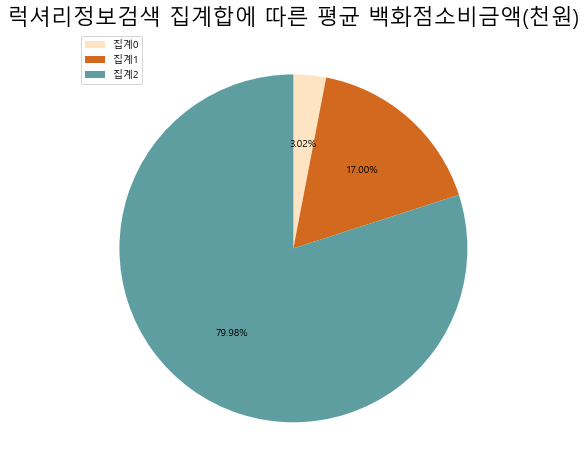

In [ ]:
lxr_sum=["집계0","집계1","집계2"]
values=[a,b,c]

fig=plt.figure(figsize=(8,8))
fig.set_facecolor("white")
ax=fig.add_subplot()

pie=ax.pie(values,
          startangle=90,
          counterclock=False,
          autopct=lambda p :'{:.2f}%'.format(p),
         
          colors=["bisque","chocolate","cadetblue"])
plt.title("럭셔리정보검색 집계합에 따른 평균 백화점소비금액(천원)", fontsize=22)
plt.legend(pie[0], lxr_sum)   

In [ ]:
condition=(lxr.하이엔드명품_정보!=0)|(lxr.하이엔드백화점_정보!=0)
lxr_non=lxr.loc[condition] 

In [ ]:
condition2=(((lxr.하이엔드명품_정보)==0)*(((lxr.하이엔드백화점_정보)==0)))
lxr_zeros=lxr.loc[condition2]

In [ ]:
len(lxr_non)

340546

In [ ]:
len(lxr_zeros)

93664

In [ ]:
lxr_zeros["럭셔리지수"]=1

<ipython-input-152-724bccbbdf92>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
aa=lxr_non["하이엔드백화점_정보"]
aa=aa.values.reshape(-1,1)
bb=lxr_non["하이엔드명품_정보"]
bb=bb.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
a_scaled=sc.fit_transform(aa)
b_scaled=sc.fit_transform(bb)

In [ ]:
lxr_non.하이엔드명품_정보=a_scaled
lxr_non.하이엔드백화점_정보=b_scaled

<ipython-input-155-a2cda9443f34>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-155-a2cda9443f34>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lxr_non["럭셔리지수_C"]=(lxr_non["백화점이용금액"]/lxr_non["카드소비금액"]*10)


<ipython-input-156-42e7d4650563>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lxr_non.럭셔리지수_C.describe(percentiles=[.10,.30,.75,.90])

count   340546.00000
mean        75.68568
std        577.10500
min          0.00000
10%          0.00000
30%         12.69015
50%         34.41911
75%         87.02642
90%        179.44059
max     311255.15000
Name: 럭셔리지수_C, dtype: float64

In [ ]:
lxr_non["럭셔리지수"]=np.log((a_scaled+b_scaled)*1000+1)

lxr_non["럭셔리지수_C"]=np.log(lxr_non.럭셔리지수_C+1)

<ipython-input-158-6c4b62bdff53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-158-6c4b62bdff53>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
c=lxr_non["럭셔리지수_C"]
c

0        3.18405
1        5.67562
2        2.88030
3        4.65657
4        2.96167
           ...  
434204   3.39406
434206   2.63393
434207   5.04565
434208   6.47293
434209   4.13500
Name: 럭셔리지수_C, Length: 340546, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='럭셔리지수_C', ylabel='Density'>

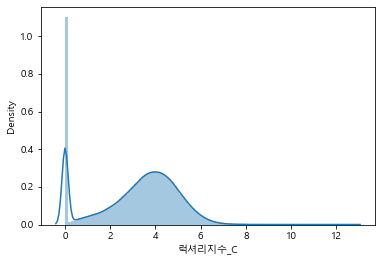

In [ ]:
sns.distplot(lxr_non.럭셔리지수_C, bins=100)  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='럭셔리지수', ylabel='Density'>

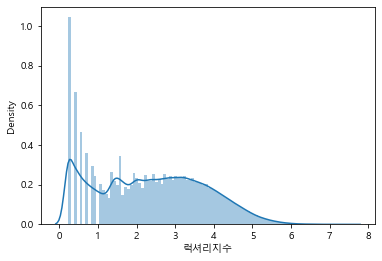

In [ ]:
sns.distplot(lxr_non.럭셔리지수, bins=100) 

In [ ]:
df=lxr_non.copy()
df['럭셔리지수'][(lxr_non['럭셔리지수']< (lxr_non['럭셔리지수']).quantile(.10))]=1
df['럭셔리지수'][(lxr_non['럭셔리지수']>= (lxr_non['럭셔리지수']).quantile(.10)) &(lxr_non['럭셔리지수']<(lxr_non['럭셔리지수']).quantile(.30))]=2
df['럭셔리지수'][(lxr_non['럭셔리지수']>=(lxr_non['럭셔리지수']).quantile(.30)) &(lxr_non['럭셔리지수']<(lxr_non['럭셔리지수']).quantile(.75))]=3
df['럭셔리지수'][((lxr_non['럭셔리지수']>=(lxr_non['럭셔리지수']).quantile(.75)))&(lxr_non['럭셔리지수']<(lxr_non['럭셔리지수']).quantile(.90))]=4
df['럭셔리지수'][(lxr_non['럭셔리지수']>=(lxr_non['럭셔리지수']).quantile(.90))]=5                                        

df['럭셔리지수_C'][(lxr_non['럭셔리지수_C']<(lxr_non['럭셔리지수_C']).quantile(.10))]=1
df['럭셔리지수_C'][(lxr_non['럭셔리지수_C']>=(lxr_non['럭셔리지수_C']).quantile(.10)) &(lxr_non['럭셔리지수_C']< (lxr_non['럭셔리지수_C']).quantile(.30))]=2
df['럭셔리지수_C'][(lxr_non['럭셔리지수_C']>=(lxr_non['럭셔리지수_C']).quantile(.30)) &(lxr_non['럭셔리지수_C']< (lxr_non['럭셔리지수_C']).quantile(.75))]=3
df['럭셔리지수_C'][((lxr_non['럭셔리지수_C']>= (lxr_non['럭셔리지수_C']).quantile(.75)))&(lxr_non['럭셔리지수_C']< (lxr_non['럭셔리지수_C']).quantile(.90))]=4
df['럭셔리지수_C'][(lxr_non['럭셔리지수_C']>= (lxr_non['럭셔리지수_C']).quantile(.90))]=5                                        
df

<ipython-input-162-88c2d51c82c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-162-88c2d51c82c2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-162-88c2d51c82c2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-162-88c2d51c82c2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수_C,럭셔리지수
0,449000,9607630,9,2,194000,0.00502,0.00585,3.00000,3.00000
1,1433000,7744560,8,5,49300,0.00079,0.00000,5.00000,2.00000
2,330000,10609180,11,4,196200,0.00106,0.00000,3.00000,2.00000
3,1610000,11066770,2,1,154400,0.02485,0.00292,4.00000,3.00000
4,1010000,27984730,21,3,551000,0.00820,0.00000,3.00000,3.00000
...,...,...,...,...,...,...,...,...,...
434204,344000,10399630,1,1,119500,0.00793,0.04094,3.00000,4.00000
434206,215000,16956640,9,4,166300,0.00846,0.00000,3.00000,3.00000
434207,3570000,17045770,6,3,231300,0.02300,0.00585,4.00000,3.00000
434208,5798000,5612160,3,2,89700,0.02485,0.00000,5.00000,3.00000


In [ ]:
lxr_zeros

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수
14,312000,10815250,8,5,46100,0,0,1
20,0,3582220,5,4,41700,0,0,1
23,37000,707500,1,2,23500,0,0,1
29,0,6164100,6,5,84700,0,0,1
31,452000,1702080,0,1,27200,0,0,1
...,...,...,...,...,...,...,...,...
434170,60000,20065360,14,5,80000,0,0,1
434185,776000,14752810,11,5,174200,0,0,1
434190,90000,10935470,9,5,46000,0,0,1
434195,0,6127610,5,5,75900,0,0,1


In [ ]:
lxr_zeros["럭셔리지수_C"]=np.log(lxr_zeros["백화점이용금액"]/lxr_zeros["카드소비금액"]*10+1)

<ipython-input-164-6253b1821594>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lxr_zeros

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수,럭셔리지수_C
14,312000,10815250,8,5,46100,0,0,1,4.22944
20,0,3582220,5,4,41700,0,0,1,0.00000
23,37000,707500,1,2,23500,0,0,1,2.81808
29,0,6164100,6,5,84700,0,0,1,0.00000
31,452000,1702080,0,1,27200,0,0,1,5.11905
...,...,...,...,...,...,...,...,...,...
434170,60000,20065360,14,5,80000,0,0,1,2.14007
434185,776000,14752810,11,5,174200,0,0,1,3.81873
434190,90000,10935470,9,5,46000,0,0,1,3.02360
434195,0,6127610,5,5,75900,0,0,1,0.00000


In [ ]:
df.럭셔리지수_C.describe(percentiles=[.10,.30,.75,.90])

count   340546.00000
mean         3.05000
std          0.92060
min          2.00000
10%          2.00000
30%          2.50000
50%          3.00000
75%          3.75000
90%          4.50000
max          5.00000
Name: 럭셔리지수_C, dtype: float64

In [ ]:
lxr_zeros["럭셔리지수_C"][(lxr_zeros.럭셔리지수_C<df.럭셔리지수_C.quantile(.10) )]=1
lxr_zeros["럭셔리지수_C"][(lxr_zeros.럭셔리지수_C>=df.럭셔리지수_C.quantile(.10))&(lxr_zeros.럭셔리지수_C <df.럭셔리지수_C.quantile(.30))]=2
lxr_zeros["럭셔리지수_C"][(lxr_zeros.럭셔리지수_C>=df.럭셔리지수_C.quantile(.30))&(lxr_zeros.럭셔리지수_C<df.럭셔리지수_C.quantile(.75))]=3
lxr_zeros["럭셔리지수_C"][(lxr_zeros.럭셔리지수_C>=df.럭셔리지수_C.quantile(.75))&(lxr_zeros.럭셔리지수_C< df.럭셔리지수_C.quantile(.90))]=4

lxr_zeros["럭셔리지수_C"][(lxr_zeros.럭셔리지수_C>= df.럭셔리지수_C.quantile(.90))]=5

<ipython-input-167-0678f1ff3b8d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-0678f1ff3b8d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-0678f1ff3b8d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-0678f1ff3b8d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
lxr_zeros

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수,럭셔리지수_C
14,312000,10815250,8,5,46100,0,0,1,4.00000
20,0,3582220,5,4,41700,0,0,1,1.00000
23,37000,707500,1,2,23500,0,0,1,3.00000
29,0,6164100,6,5,84700,0,0,1,1.00000
31,452000,1702080,0,1,27200,0,0,1,5.00000
...,...,...,...,...,...,...,...,...,...
434170,60000,20065360,14,5,80000,0,0,1,2.00000
434185,776000,14752810,11,5,174200,0,0,1,4.00000
434190,90000,10935470,9,5,46000,0,0,1,3.00000
434195,0,6127610,5,5,75900,0,0,1,1.00000


In [ ]:
df.groupby("럭셔리지수")["총자산평가금액"].sum()/df.groupby("럭셔리지수")["총자산평가금액"].count()

럭셔리지수
1.00000    3165891.98559
2.00000    5041905.04583
3.00000    9861701.67346
4.00000   21417628.66027
5.00000   54921336.09094
Name: 총자산평가금액, dtype: float64

In [ ]:
df.groupby("럭셔리지수")["카드소비금액"].sum()/df.groupby("럭셔리지수")["카드소비금액"].count()  ##과소비성향은 럭셔리지수따라감

럭셔리지수
1.00000     71357.33593
2.00000    115259.60200
3.00000    248619.65518
4.00000    518213.74584
5.00000   1071813.70828
Name: 카드소비금액, dtype: float64

In [ ]:
df.groupby("럭셔리지수_C")["백화점이용금액"].sum()/df.groupby("럭셔리지수_C")["총자산평가금액"].count()  ## 과소비 성향은 구매력지수 따라가지 않음

럭셔리지수_C
2.00000     84166.53616
3.00000   1784977.95512
4.00000   5596121.88577
5.00000   8669538.14747
dtype: float64

In [ ]:
df.groupby("럭셔리지수_C")["카드소비금액"].sum()/df.groupby("럭셔리지수_C")["총자산평가금액"].count()  ## 과소비 성향은 구매력지수 따라가지 않음

럭셔리지수_C
2.00000   161054.29114
3.00000   403627.36468
4.00000   457048.92917
5.00000   300500.07928
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



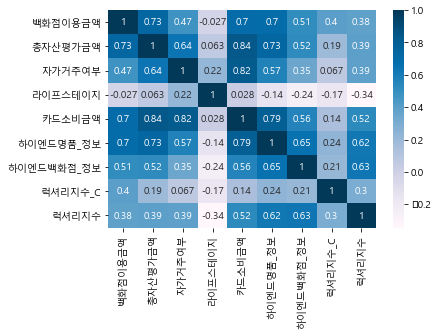

In [ ]:
df_corr=df.corr()    ## 럭셔리관심도만 측정된 럭셔리지수가 가중치된 지수와 평균 소비금액 차이 나는지                          
sns.heatmap(df_corr, cmap="PuBu", annot=True)

In [ ]:
lxr_zeros.groupby("럭셔리지수_C")["카드소비금액"].sum()/lxr_zeros.groupby("럭셔리지수_C")["총자산평가금액"].count() 

럭셔리지수_C
1.00000   31934.45773
2.00000   73333.08725
3.00000   66960.45538
4.00000   57034.02732
5.00000   42383.98238
dtype: float64

In [ ]:
df

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수_C,럭셔리지수
0,449000,9607630,9,2,194000,0.00502,0.00585,3.00000,3.00000
1,1433000,7744560,8,5,49300,0.00079,0.00000,5.00000,2.00000
2,330000,10609180,11,4,196200,0.00106,0.00000,3.00000,2.00000
3,1610000,11066770,2,1,154400,0.02485,0.00292,4.00000,3.00000
4,1010000,27984730,21,3,551000,0.00820,0.00000,3.00000,3.00000
...,...,...,...,...,...,...,...,...,...
434204,344000,10399630,1,1,119500,0.00793,0.04094,3.00000,4.00000
434206,215000,16956640,9,4,166300,0.00846,0.00000,3.00000,3.00000
434207,3570000,17045770,6,3,231300,0.02300,0.00585,4.00000,3.00000
434208,5798000,5612160,3,2,89700,0.02485,0.00000,5.00000,3.00000


In [ ]:
lxr_result=pd.concat([lxr_zeros, df])
lxr_result=lxr_result.sort_index()
lxr_result.reset_index(inplace=True,drop=True)

In [ ]:
lxr_result

,백화점이용금액,총자산평가금액,자가거주여부,라이프스테이지,카드소비금액,하이엔드명품_정보,하이엔드백화점_정보,럭셔리지수,럭셔리지수_C
0,449000,9607630,9,2,194000,0.00502,0.00585,3.00000,3.00000
1,1433000,7744560,8,5,49300,0.00079,0.00000,2.00000,5.00000
2,330000,10609180,11,4,196200,0.00106,0.00000,2.00000,3.00000
3,1610000,11066770,2,1,154400,0.02485,0.00292,3.00000,4.00000
4,1010000,27984730,21,3,551000,0.00820,0.00000,3.00000,3.00000
...,...,...,...,...,...,...,...,...,...
434205,1074000,11207130,5,5,53400,0.00000,0.00000,1.00000,5.00000
434206,215000,16956640,9,4,166300,0.00846,0.00000,3.00000,3.00000
434207,3570000,17045770,6,3,231300,0.02300,0.00585,3.00000,4.00000
434208,5798000,5612160,3,2,89700,0.02485,0.00000,3.00000,5.00000


In [ ]:
lxr_result.isnull().sum() #럭셔리지수_C

백화점이용금액       0
총자산평가금액       0
자가거주여부        0
라이프스테이지       0
카드소비금액        0
하이엔드명품_정보     0
하이엔드백화점_정보    0
럭셔리지수         0
럭셔리지수_C       0
dtype: int64

In [ ]:
lxr_result.to_csv("./LXR.csv", index=False)